# Reading HTML tables with Pandas

The pandas read_html() function is a quick and convenient way to turn an HTML table into a pandas DataFrame. This function can be useful for quickly incorporating tables from various websites without figuring out how to scrape the site’s HTML. However, there can be some challenges in cleaning and formatting the data before analyzing it. Today we will discuss how to use pandas read_html() to read and clean several Wikipedia HTML tables so that we can use them for further numeric analysis.

In [12]:
import pandas as pd

html = '''<table>
  <tr>
    <th>a</th>
    <th>b</th>
    <th>c</th>
    <th>d</th>
  </tr>
  <tr>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
  </tr>
  <tr>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
  </tr>
</table>'''

df = pd.read_html(html)

In [13]:
#Now, the result we get is not a Pandas DataFrame but a Python list. 
#That is, if we use the type() function we can see that:
type(df)

list

In [15]:
df

[   a  b  c  d
 0  1  2  3  4
 1  5  6  7  8]

In [14]:
#If we want to get the table, we can use the first index of the list (0):
df[0]

,a,b,c,d
0,1,2,3,4
1,5,6,7,8


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

# The unicodedata module provides access to the 
# Unicode Character Database (UCD) which defines character
# properties for all Unicode characters. The data contained 
# in this database is compiled from the UCD version 13.0.

table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')

In [2]:
print(f'Total tables: {len(table_MN)}')

Total tables: 29


With 29 tables, it can be challenging to find the one we need. To make the table selection easier, we use the match parameter to select a subset of tables. We can use the caption “Election results from statewide races” to select the table:

In [3]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Election results from statewide races')
len(table_MN)

1

In [4]:
df = table_MN[0]
df.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3%,52.4%,2.3%
1,2020,Senator,43.5%,48.8%,7.7%
2,2018,Governor,42.4%,53.9%,3.7%
3,2018,Senator,36.2%,60.3%,3.4%
4,2018,Senator,42.4%,53.0%,4.6%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    26 non-null     int64 
 1   Office  26 non-null     object
 2   GOP     26 non-null     object
 3   DFL     26 non-null     object
 4   Others  26 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


We need to convert the GOP, DFL and Other columns to numeric values if we want to do any analysis.

In [6]:
# Let us try
df['GOP'].astype('float')

ValueError: could not convert string to float: '45.3%'

The most likely culprit is the % . We can get rid of it using pandas replace() function.

In [7]:
df['GOP'].replace({'%':''}, regex=True).astype('float')
# We use the regex=True parameter for this to work 
# since the % is a part of the string and not the full 
# string value.

0     45.3
1     43.5
2     42.4
3     36.2
4     42.4
5     44.9
6     44.5
7     42.9
8     45.1
9     30.6
10    43.2
11    43.8
12    42.0
13    46.7
14    37.9
15    47.6
16    44.4
17    49.5
18    45.5
19    43.3
20    34.3
21    35.0
22    41.3
23    63.3
24    49.1
25    31.9
Name: GOP, dtype: float64

Now, we can call replace all the % values and convert to numbers using pd.to_numeric() and apply()

In [8]:
df = df.replace({'%': ''}, regex=True)
df[['GOP', 'DFL', 'Others']] = df[['GOP', 'DFL', 'Others']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    26 non-null     int64  
 1   Office  26 non-null     object 
 2   GOP     26 non-null     float64
 3   DFL     26 non-null     float64
 4   Others  26 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
df.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3,52.4,2.3
1,2020,Senator,43.5,48.8,7.7
2,2018,Governor,42.4,53.9,3.7
3,2018,Senator,36.2,60.3,3.4
4,2018,Senator,42.4,53.0,4.6


# Let us go to more difficult examples

In [10]:
table_GDP = pd.read_html('https://en.wikipedia.org/wiki/Economy_of_the_United_States', match='Nominal GDP')
df_GDP = table_GDP[0]
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              41 non-null     object 
 1   Nominal GDP(billions USD)                         41 non-null     float64
 2   GDP per capita(USD)                               41 non-null     int64  
 3   GDP growth(real)                                  41 non-null     object 
 4   Inflation rate(in %)                              41 non-null     object 
 5   Unemployment(in %)                                41 non-null     object 
 6   Budget balance(in % of GDP)[106]                  41 non-null     object 
 7   Government debt held by public(in % of GDP)[107]  41 non-null     object 
 8   Current accountbalance(in % of GDP)               41 non-null     object 
dtypes: float64(1), int64(1),

In [18]:
df_GDP.head()

,Year,Nominal GDP(billions USD),GDP per capita(USD),GDP growth(real),Inflation rate(in %),Unemployment(in %),Budget balance(in % of GDP)[106],Government debt held by public(in % of GDP)[107],Current accountbalance(in % of GDP)
0,2020 (est),20934.0,57589,−3.5 %,0.62 %,11.1 %,−n/a %,79.9 %,−n/a %
1,2019,21439.0,64674,2.2 %,1.8 %,3.5 %,−4.6 %,78.9 %,−2.5 %
2,2018,20611.2,62869,3.0 %,2.4 %,3.9 %,−3.8 %,77.8 %,−2.4 %
3,2017,19519.4,60000,2.3%,2.1 %,4.4 %,−3.4 %,76.1%,−2.3 %
4,2016,18715.0,57878,1.7 %,1.3 %,4.9 %,−3.1 %,76.4%,−2.3 %


In [15]:
df_GDP['GDP growth(real)'].replace({'%': ''}, regex=True).astype('float')

ValueError: could not convert string to float: '−3.5\xa0'

The issue above is that we have a hidden character, xa0 that is causing some errors. This is a “non-breaking Latin1 (ISO 8859-1) space”.

One option we can consider is directly removing the value using replace . It will work but probably it would or would not break with other characters in the future.

We have to understand the unicode, and use normalize to clean this value. I encourage you to read this article for more details on the rationale for the following approach.
https://towardsdatascience.com/difference-between-nfd-nfc-nfkd-and-nfkc-explained-with-python-code-e2631f96ae6c

In [23]:
from unicodedata import normalize

def clean_normalize_whitespace(x):
    if isinstance(x, str):
        return normalize('NFKC', x).strip()
    else:
        return x

In [24]:
df_GDP = df_GDP.applymap(clean_normalize_whitespace)

applymap function is very slow so we should be judicious in using it.
The applymap function is a very inefficient pandas function. We should not use it very often but in this case, the DataFrame is small and cleaning like this is tricky so I think it is a useful trade-off.

One thing that applymap misses is the columns. Let’s look at one column in more detail:

In [25]:
df_GDP.columns[7]

'Government debt held by public(in\xa0% of GDP)[107]'

In [26]:
df_GDP.columns = df_GDP.columns.to_series().apply(clean_normalize_whitespace)
df_GDP.columns[7]

'Government debt held by public(in % of GDP)[107]'

In [28]:
df_GDP['GDP growth(real)'].replace({'%': ''}, regex=True).astype('float')

ValueError: could not convert string to float: '−3.5 '

This one is really tricky. If we look really closely, we might be able to tell that the − looks a little different than the - . It’s hard to see but there is actually a difference between the unicode dash and minus. Ugh.

Fortunately, we can use replace to clean that up too:

In [29]:
df_GDP['GDP growth(real)'].replace({'%': '', '−': '-'}, regex=True).astype('float')

0    -3.5
1     2.2
2     3.0
3     2.3
4     1.7
5     3.1
6     2.5
7     1.8
8     2.2
9     1.6
10    2.6
11   -2.5
12   -0.2
13    1.9
14    2.9
15    3.3
16    3.8
17    2.8
18    1.8
19    1.0
20    4.1
21    4.8
22    4.5
23    4.4
24    3.7
25    2.7
26    4.0
27    2.7
28    3.6
29   -0.1
30    1.9
31    3.7
32    4.2
33    3.5
34    3.5
35    4.2
36    7.2
37    4.6
38   -1.8
39    2.6
40   -0.2
Name: GDP growth(real), dtype: float64

One other column we need to look at is the Year column. For 2020, it contains “2020 (est)” which we want to get rid of. Then convert the column to an int. I can add to the dictionary but have to escape the parentheses since they are special characters in a regular expression:

In [39]:
df_GDP['Year'].replace({'%': '', '−': '-', '\(est\)': ''}, regex=True).astype('int')

0     2020
1     2019
2     2018
3     2017
4     2016
5     2015
6     2014
7     2013
8     2012
9     2011
10    2010
11    2009
12    2008
13    2007
14    2006
15    2005
16    2004
17    2003
18    2002
19    2001
20    2000
21    1999
22    1998
23    1997
24    1996
25    1995
26    1994
27    1993
28    1992
29    1991
30    1990
31    1989
32    1988
33    1987
34    1986
35    1985
36    1984
37    1983
38    1982
39    1981
40    1980
Name: Year, dtype: int64

# Combine All and write the final code now

In [1]:
import pandas as pd
import numpy as np
from unicodedata import normalize

In [2]:
def clean_normalize_whitespace(x):
    """ Normalize unicode characters and strip trailing spaces
    """
    if isinstance(x, str):
        return normalize('NFKC', x).strip()
    else:
        return x

In [3]:
# Read in the Wikipedia page and get the DataFrame
table_GDP = pd.read_html(
    'https://en.wikipedia.org/wiki/Economy_of_the_United_States',
    match='Nominal GDP')
df_GDP = table_GDP[0]

In [4]:
# Clean up the DataFrame and Columns
df_GDP = df_GDP.applymap(clean_normalize_whitespace)
df_GDP.columns = df_GDP.columns.to_series().apply(clean_normalize_whitespace)

In [5]:
df_GDP.head()

,Year,Nominal GDP(billions USD),GDP per capita(USD),GDP growth(real),Inflation rate(in %),Unemployment(in %),Budget balance(in % of GDP)[106],Government debt held by public(in % of GDP)[107],Current accountbalance(in % of GDP)
0,2020 (est),20934.0,57589,−3.5 %,0.62 %,11.1 %,−n/a %,79.9 %,−n/a %
1,2019,21439.0,64674,2.2 %,1.8 %,3.5 %,−4.6 %,78.9 %,−2.5 %
2,2018,20611.2,62869,3.0 %,2.4 %,3.9 %,−3.8 %,77.8 %,−2.4 %
3,2017,19519.4,60000,2.3%,2.1 %,4.4 %,−3.4 %,76.1%,−2.3 %
4,2016,18715.0,57878,1.7 %,1.3 %,4.9 %,−3.1 %,76.4%,−2.3 %


In [6]:
# Values to replace
clean_dict = {'%': '', '−': '-', '\(est\)': ''}

In [7]:
# Replace values and convert to numeric values
#df_GDP['Year'] = df_GDP['Year'].replace(clean_dict, regex=True).astype('int')
#df_GDP['Nominal GDP(billions USD)'] = df_GDP['Nominal GDP(billions USD)'].replace(clean_dict, regex=True).astype('float')
#df_GDP['GDP per capita(USD)'] = df_GDP['GDP per capita(USD)'].replace(clean_dict, regex=True).astype('int')
#df_GDP['GDP growth(real)'] = df_GDP['GDP growth(real)'].replace(clean_dict, regex=True).astype('float')
#df_GDP['Inflation rate(in %)'] = df_GDP['Inflation rate(in %)'].replace(clean_dict, regex=True).astype('float')
#df_GDP['Unemployment(in %)'] = df_GDP['Unemployment(in %)'].replace(clean_dict, regex=True).astype('float')
#df_GDP['Budget balance(in % of GDP)[106]'] = df_GDP['Budget balance(in % of GDP)[106]'].replace(clean_dict, regex=True).replace({
#    '-n/a ': np.nan}).astype('float')
#df_GDP['Government debt held by public(in % of GDP)[107]'] = df_GDP['Government debt held by public(in % of GDP)[107]'].replace(clean_dict, regex=True).astype('float')
#df_GDP['Current accountbalance(in % of GDP)'] = df_GDP['Current accountbalance(in % of GDP)'].replace(clean_dict, regex=True).replace({
#    '-n/a ': np.nan}).astype('float')
#df_GDP.info()

In [8]:
# Determine numeric types for each column
col_type = {
    'Year': 'int',
    'Nominal GDP(billions USD)': 'float',
    'GDP per capita(USD)': 'int',
    'GDP growth(real)': 'float',
    'Inflation rate(in %)': 'float',
    'Unemployment(in %)': 'float',
    'Budget balance(in % of GDP)[106]': 'float',
    'Government debt held by public(in % of GDP)[107]': 'float',
    'Current accountbalance(in % of GDP)': 'float'
}


# Replace values and convert to numeric values
df_GDP = df_GDP.replace(clean_dict, regex=True).replace({
    '-n/a ': np.nan
}).astype(col_type)

In [9]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              41 non-null     int64  
 1   Nominal GDP(billions USD)                         41 non-null     float64
 2   GDP per capita(USD)                               41 non-null     int64  
 3   GDP growth(real)                                  41 non-null     float64
 4   Inflation rate(in %)                              41 non-null     float64
 5   Unemployment(in %)                                41 non-null     float64
 6   Budget balance(in % of GDP)[106]                  40 non-null     float64
 7   Government debt held by public(in % of GDP)[107]  41 non-null     float64
 8   Current accountbalance(in % of GDP)               40 non-null     float64
dtypes: float64(7), int64(2)


In [10]:
df_GDP.head()

,Year,Nominal GDP(billions USD),GDP per capita(USD),GDP growth(real),Inflation rate(in %),Unemployment(in %),Budget balance(in % of GDP)[106],Government debt held by public(in % of GDP)[107],Current accountbalance(in % of GDP)
0,2020,20934.0,57589,-3.5,0.62,11.1,NaN,79.9,NaN
1,2019,21439.0,64674,2.2,1.80,3.5,-4.6,78.9,-2.5
2,2018,20611.2,62869,3.0,2.40,3.9,-3.8,77.8,-2.4
3,2017,19519.4,60000,2.3,2.10,4.4,-3.4,76.1,-2.3
4,2016,18715.0,57878,1.7,1.30,4.9,-3.1,76.4,-2.3


<AxesSubplot:xlabel='Year'>

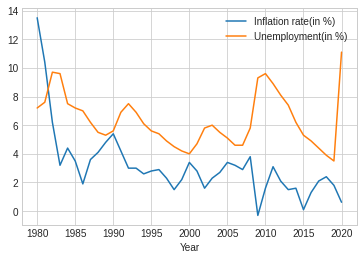

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df_GDP.plot.line(x='Year', y=['Inflation rate(in %)', 'Unemployment(in %)'])